In [1]:
import numpy as np

In [2]:
# Creating Data
X = np.array([[1,3,5,7,9,13,20,20, 21, 24, 26],
              [5,7,11, 14,15,17, 18, 19, 21, 22, 26]])
X = X.T
print(X)

[[ 1  5]
 [ 3  7]
 [ 5 11]
 [ 7 14]
 [ 9 15]
 [13 17]
 [20 18]
 [20 19]
 [21 21]
 [24 22]
 [26 26]]


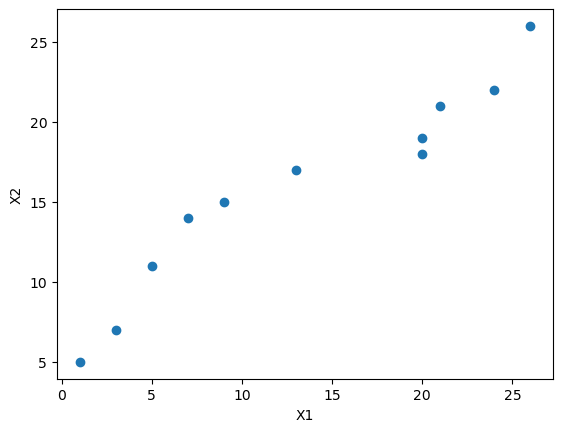

In [3]:
# Plotting the data
import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:,1])
plt.xlabel("X1")
plt.ylabel("X2")
plt.show()

In [4]:
# Normalize the data by shifting the mean of data to 0
X_meaned = X - np.mean(X, axis = 0) 
# Take the mean along the column and substarct it from respective entry of the colunmn to force the mean to 0
print(X_meaned)

[[-12.54545455 -10.90909091]
 [-10.54545455  -8.90909091]
 [ -8.54545455  -4.90909091]
 [ -6.54545455  -1.90909091]
 [ -4.54545455  -0.90909091]
 [ -0.54545455   1.09090909]
 [  6.45454545   2.09090909]
 [  6.45454545   3.09090909]
 [  7.45454545   5.09090909]
 [ 10.45454545   6.09090909]
 [ 12.45454545  10.09090909]]


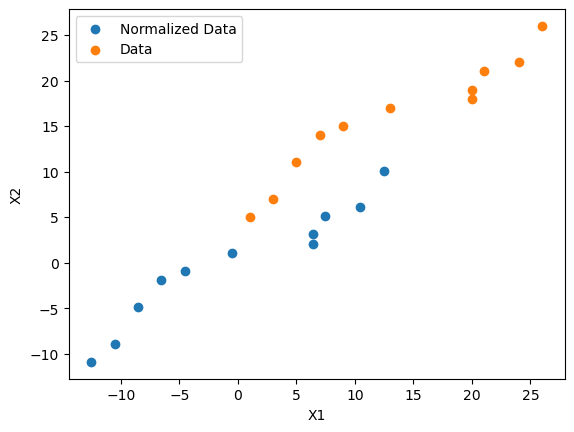

In [5]:
# Plot both data together to see the change 
plt.figure()
plt.scatter(X_meaned[:,0], X_meaned[:,1], label = "Normalized Data")
plt.scatter(X[:,0], X[:,1], label = "Data")
plt.legend(loc = "upper left")
plt.xlabel("X1")
plt.ylabel("X2")
plt.show()

# Procedural Way

In [9]:
C = np.cov(X_meaned, rowvar= False) # Calculate the Covariance Matrix for the normalized data
print(C)

[[80.87272727 54.95454545]
 [54.95454545 40.69090909]]


In [11]:
# Calculate the eigen values and eigen vectors of the covariance matrix
eval, evec = np.linalg.eig(C)
print(eval)
print(evec)
# first_eval, second_eval = eval
# first_evec, second_evec = 

[119.29375452   2.26988184]
[[ 0.81956216 -0.57299028]
 [ 0.57299028  0.81956216]]


### In PCA we have to select the top 'm' eigen values hence will sort the eigen values

In [12]:
sorted_index = np.argsort(eval)[::-1]
sorted_eval = eval[sorted_index]
# In this example it is already sorted but this cell is demonstrated for general purpose 
sorted_evec = evec[:,sorted_index]

### Specify the reduced Dimension 

In [14]:
n = 1
evec_subset = sorted_evec[:, 0:n]
print(evec_subset)

[[0.81956216]
 [0.57299028]]


In [16]:
# Transform Data:
X_reduced = np.dot(evec_subset.transpose(), X_meaned.transpose()).transpose()
print(X_reduced)

[[-16.53258291]
 [-13.74747803]
 [ -9.81639259]
 [ -6.45829743]
 [ -4.24618282]
 [  0.17804639]
 [  6.48797183]
 [  7.0609621 ]
 [  9.02650482]
 [ 12.05818159]
 [ 15.98926703]]


### This is the one dimensional representation of the original Data

# Direct Method

In [17]:
## Direct method 
from sklearn.decomposition import PCA
pca = PCA(n_components = 1)
pca.fit(X_meaned) # From this PCA will learn the 1st eigen vectors and other eigen vectors
Xr = pca.transform(X_meaned) # This will project the meaned data onto the reduced dimensional space
print(Xr)

[[ 16.53258291]
 [ 13.74747803]
 [  9.81639259]
 [  6.45829743]
 [  4.24618282]
 [ -0.17804639]
 [ -6.48797183]
 [ -7.0609621 ]
 [ -9.02650482]
 [-12.05818159]
 [-15.98926703]]
